### Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

### Step 2: Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('../data/breast-cancer.csv')

# Display basic info
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop the 'id' column (if present)
df = df.drop(columns=['id'], errors='ignore')

# Encode the target variable (M=1, B=0)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Step 3: Exploratory Data Analysis (EDA)

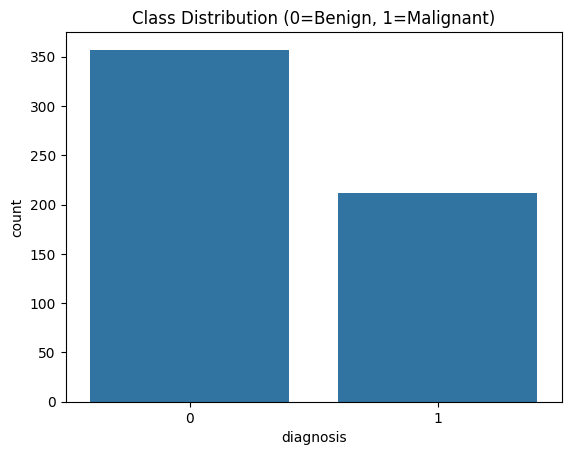

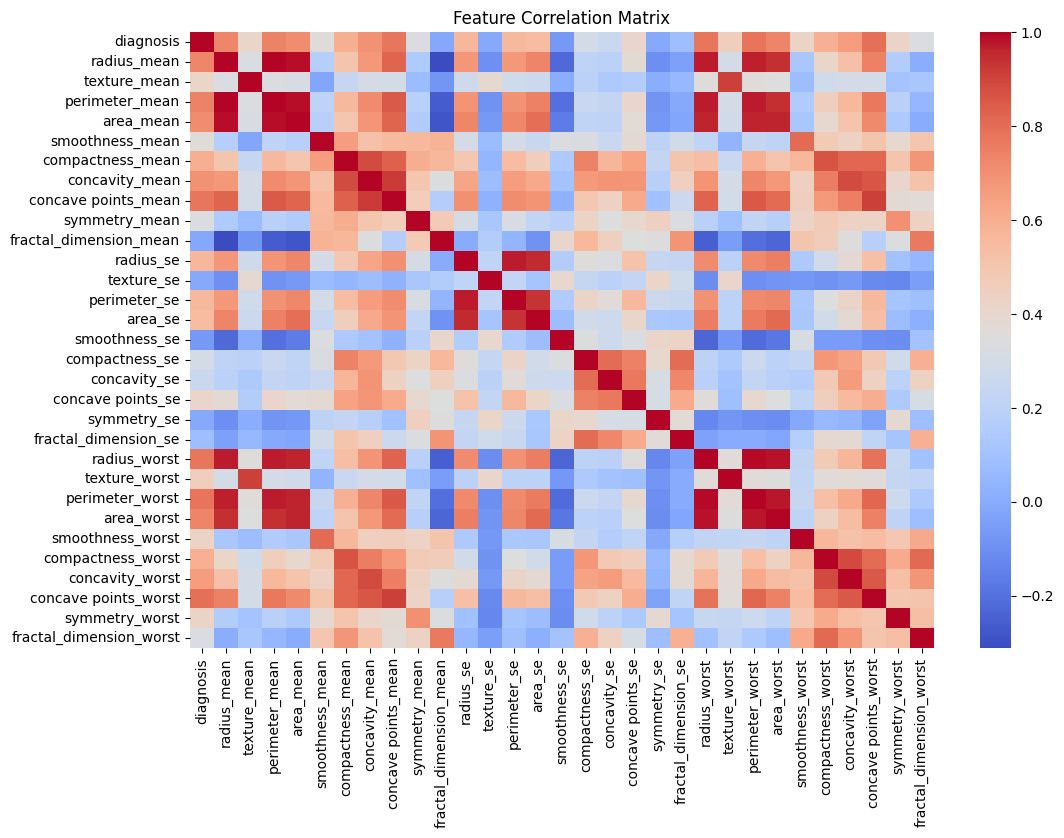

In [3]:
# Target distribution
sns.countplot(x=df['diagnosis'])
plt.title('Class Distribution (0=Benign, 1=Malignant)')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

### Step 4: Split Data into Training and Testing Sets

In [4]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Step 5: Preprocess Data

In [5]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 6: Train and Evaluate Models

In [6]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [7]:
# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM:")
print(classification_report(y_test, y_pred_svm))

SVM:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [8]:
#Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # No scaling needed for trees
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [9]:
# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))

XGBoost:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



### Step 7: Hyperparameter Tuning (Example: Random Forest)

In [10]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

# Evaluate the tuned model
y_pred_grid = grid.predict(X_test)
print(classification_report(y_test, y_pred_grid))

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



### Step 8: Feature Importance and PCA

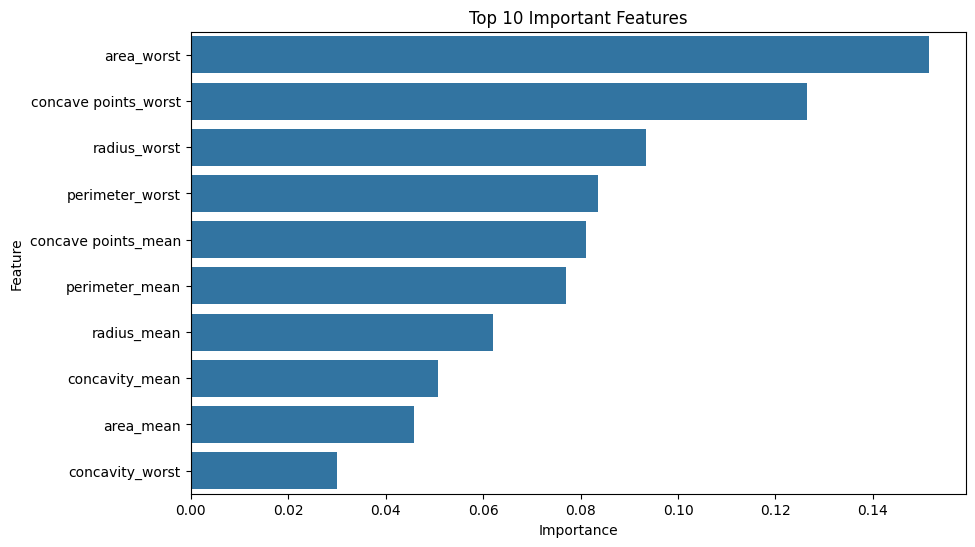

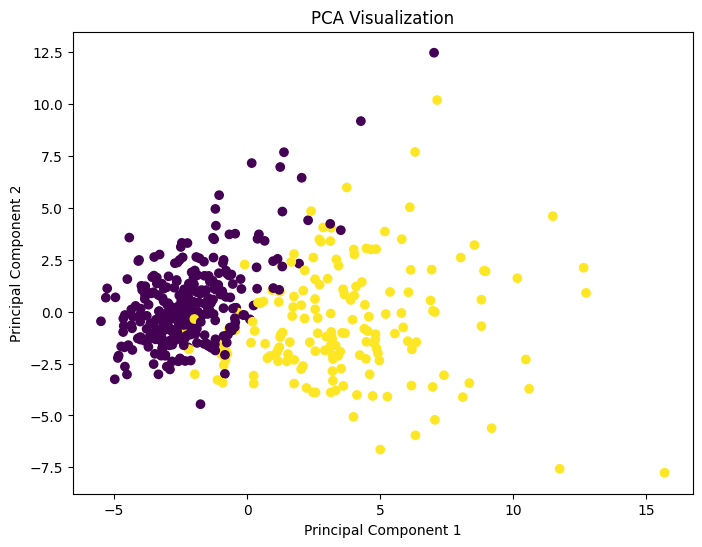

In [11]:
# Feature importance with Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features')
plt.show()

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

### Step 9: ROC Curve Comparison

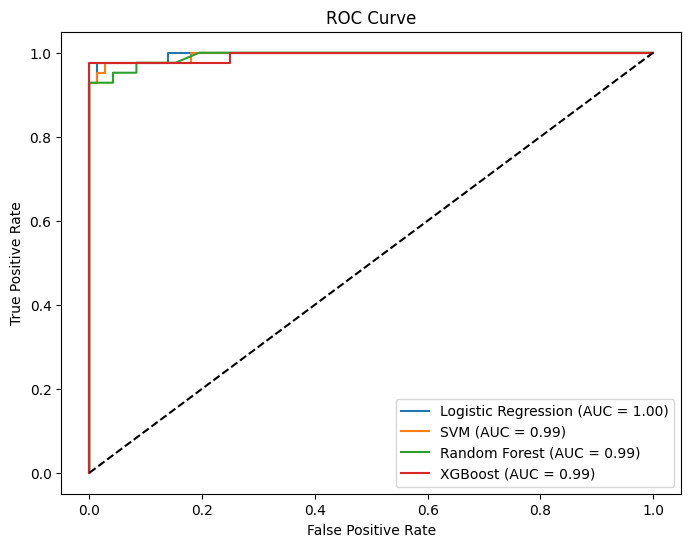

In [12]:
plt.figure(figsize=(8, 6))

for model, name in zip([lr, svm, rf, xgb], ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']):
    if name in ['Logistic Regression', 'SVM']:
        prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, prob)
    auc = roc_auc_score(y_test, prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Step 10: Save the Best Model

In [21]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, '../models/breast_cancer_rf_model.pkl')

# Save the scaler
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']

In [13]:
top_10_features = feature_importance.head(10)['Feature'].tolist()
X_top10 = X[top_10_features]

# Train-test split on new dataset
X_train_top10, X_test_top10, y_train_top10, y_test_top10 = train_test_split(X_top10, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_top10_scaled = scaler.fit_transform(X_train_top10)

In [14]:
X_top10

,area_worst,concave points_worst,radius_worst,perimeter_worst,concave points_mean,perimeter_mean,radius_mean,concavity_mean,area_mean,concavity_worst
0,2019.0,0.2654,25.380,184.60,0.14710,122.80,17.99,0.30010,1001.0,0.7119
1,1956.0,0.1860,24.990,158.80,0.07017,132.90,20.57,0.08690,1326.0,0.2416
2,1709.0,0.2430,23.570,152.50,0.12790,130.00,19.69,0.19740,1203.0,0.4504
3,567.7,0.2575,14.910,98.87,0.10520,77.58,11.42,0.24140,386.1,0.6869
4,1575.0,0.1625,22.540,152.20,0.10430,135.10,20.29,0.19800,1297.0,0.4000
...,...,...,...,...,...,...,...,...,...,...
564,2027.0,0.2216,25.450,166.10,0.13890,142.00,21.56,0.24390,1479.0,0.4107
565,1731.0,0.1628,23.690,155.00,0.09791,131.20,20.13,0.14400,1261.0,0.3215
566,1124.0,0.1418,18.980,126.70,0.05302,108.30,16.60,0.09251,858.1,0.3403
567,1821.0,0.2650,25.740,184.60,0.15200,140.10,20.60,0.35140,1265.0,0.9387


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Evaluate and store results
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Create comparison DataFrame
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print("📊 Model Performance Comparison:\n")
print(results_df)

# Optional: Show classification report for the best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)
print(f"\n📄 Classification Report for Best Model ({best_model_name}):\n")
print(classification_report(y_test, y_pred_best))

📊 Model Performance Comparison:

                 Model  Accuracy  Precision    Recall  F1 Score
2                  SVM  0.973684   1.000000  0.928571  0.962963
0  Logistic Regression  0.964912   0.975000  0.928571  0.951220
1        Random Forest  0.964912   1.000000  0.904762  0.950000
3                  KNN  0.956140   0.974359  0.904762  0.938272
4        Decision Tree  0.912281   0.880952  0.880952  0.880952

📄 Classification Report for Best Model (SVM):

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

